In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Define dataset path
data_dir  = "/content/drive/MyDrive/plantdieases"    #Replace with your path
categories = os.listdir(data_dir)
print(categories)

#Load image and labels
image = []
label = []

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (64, 64))   #Resize to uniform size
      image.append(img)
      label.append(category)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight


In [ ]:
#convert to numpy array
X = np.array(image)
y = np.array(label)

print("Labels:", np.unique(y))
print("Data shape:", X.shape)

Labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data shape: (1110, 64, 64, 3)


In [ ]:
X

array([[[[ 10,  10,   6],
         [ 10,   7,   7],
         [ 17,   6,  12],
         ...,
         [105,  96, 117],
         [131, 122, 143],
         [131, 122, 143]],

        [[ 10,   8,   6],
         [ 14,   8,  10],
         [ 46,  33,  42],
         ...,
         [125, 116, 137],
         [119, 110, 131],
         [114, 105, 126]],

        [[  9,   4,   4],
         [ 21,  12,  16],
         [ 74,  58,  68],
         ...,
         [101,  92, 113],
         [118, 109, 130],
         [130, 121, 142]],

        ...,

        [[191, 170, 179],
         [166, 145, 154],
         [190, 169, 178],
         ...,
         [159, 136, 150],
         [182, 161, 175],
         [159, 136, 150]],

        [[221, 200, 209],
         [175, 154, 163],
         [180, 159, 168],
         ...,
         [167, 144, 158],
         [163, 140, 154],
         [179, 156, 170]],

        [[170, 149, 158],
         [177, 156, 165],
         [182, 163, 172],
         ...,
         [192, 169, 183],
        

Class Distribution:
Pepper__bell___Bacterial_spot    550
Pepper__bell___healthy           230
Potato___Early_blight            110
Potato___healthy                 110
Potato___Late_blight             110
Name: count, dtype: int64


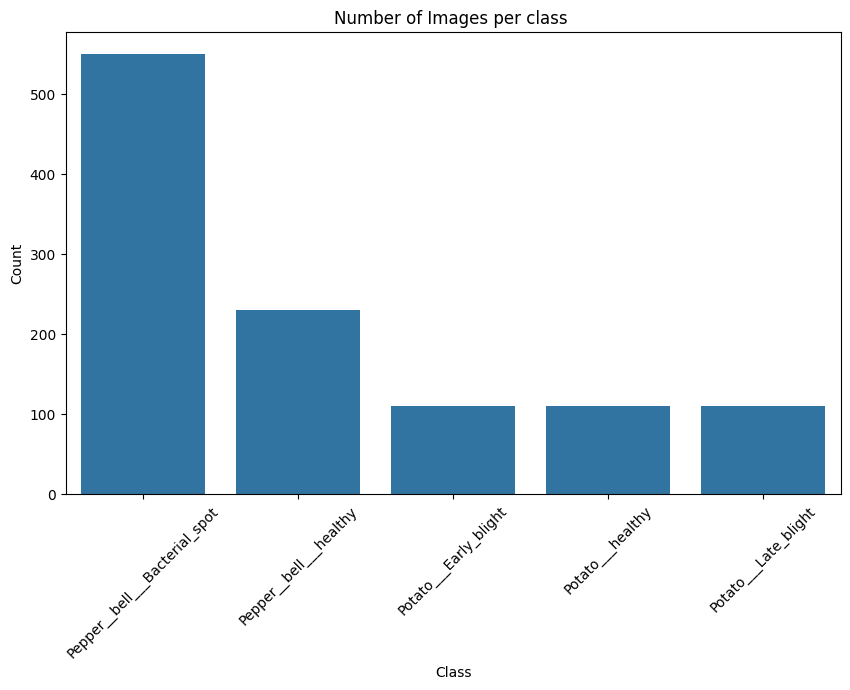

In [ ]:
#Count images per class
class_counts = pd.Series(label).value_counts()
print("Class Distribution:")
print(class_counts)

# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Images per class ")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
X

array([[[[ 10,  10,   6],
         [ 10,   7,   7],
         [ 17,   6,  12],
         ...,
         [105,  96, 117],
         [131, 122, 143],
         [131, 122, 143]],

        [[ 10,   8,   6],
         [ 14,   8,  10],
         [ 46,  33,  42],
         ...,
         [125, 116, 137],
         [119, 110, 131],
         [114, 105, 126]],

        [[  9,   4,   4],
         [ 21,  12,  16],
         [ 74,  58,  68],
         ...,
         [101,  92, 113],
         [118, 109, 130],
         [130, 121, 142]],

        ...,

        [[191, 170, 179],
         [166, 145, 154],
         [190, 169, 178],
         ...,
         [159, 136, 150],
         [182, 161, 175],
         [159, 136, 150]],

        [[221, 200, 209],
         [175, 154, 163],
         [180, 159, 168],
         ...,
         [167, 144, 158],
         [163, 140, 154],
         [179, 156, 170]],

        [[170, 149, 158],
         [177, 156, 165],
         [182, 163, 172],
         ...,
         [192, 169, 183],
        

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# save class name for later use
class_names = le.classes_

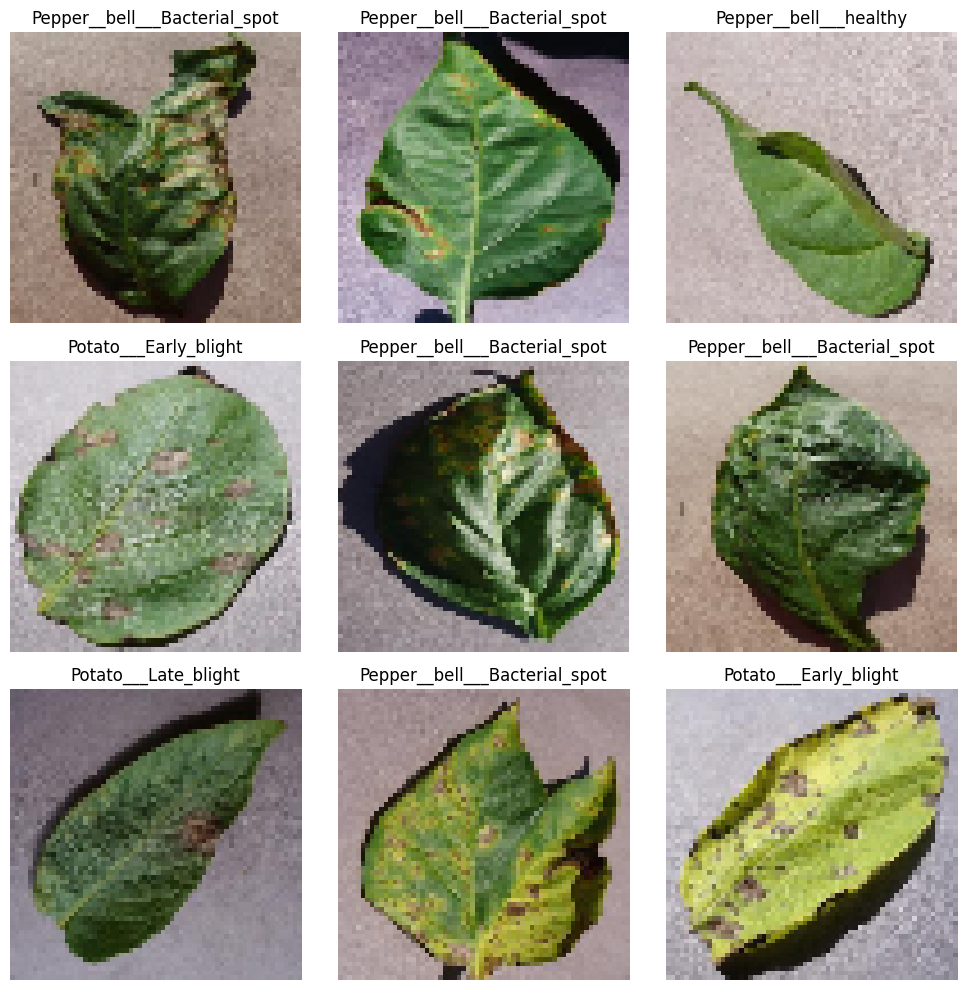

In [ ]:
#show sample images
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(X))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(X[idx],cv2.COLOR_BGR2RGB))  #Convert BGR to RGB
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
  #Convert to HSV colr space
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

#extract features
hist_features = [extract_color_histogram(img) for img in X]
X_features = np.array(hist_features)

In [ ]:
#choose model
model = SVC(kernel='rbf', C=10, gamma='scale')

step 8: Training the Model

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

step 9: Model Evaluation

Accuracy: 0.9324324324324325
F1 Score: 0.9294446557604451


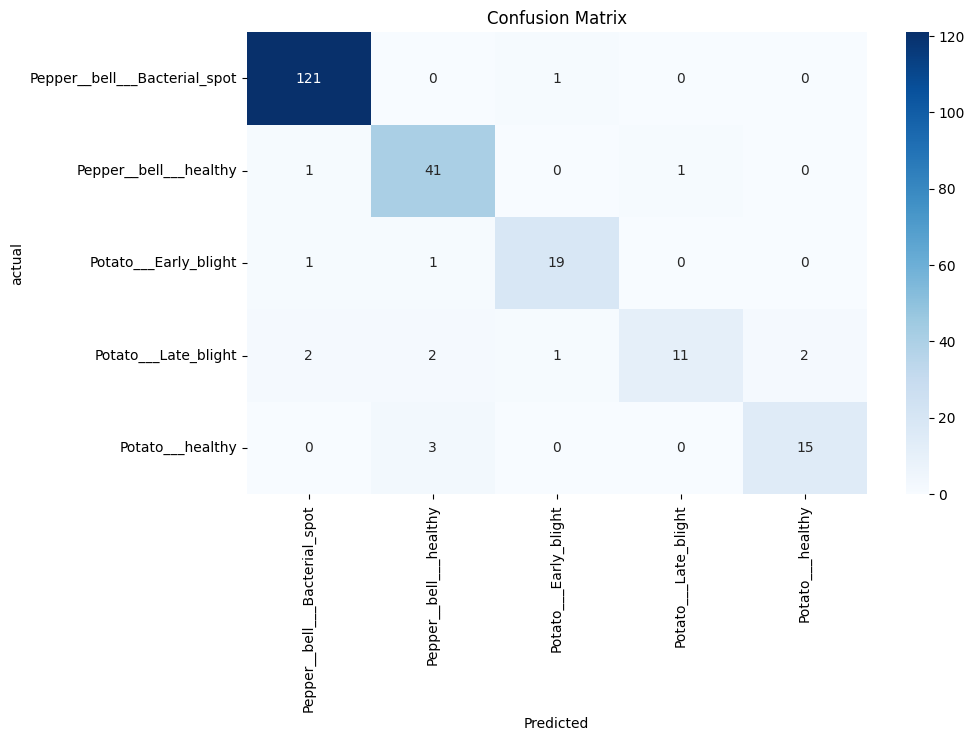

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, classification_report

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 =f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()